## Visualize image-specific class saliency with backpropagation

---

### 0. Set up

In [1]:
# Install flashtorch if you don't have it

# !pip install flashtorch

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
import torchvision.models as models

from flashtorch.utils import (apply_transforms,
                              denormalize,
                              format_for_plotting,
                              load_image)

from flashtorch.utils import ImageNetIndex

from flashtorch.saliency import Backprop

### 1. Load an image 

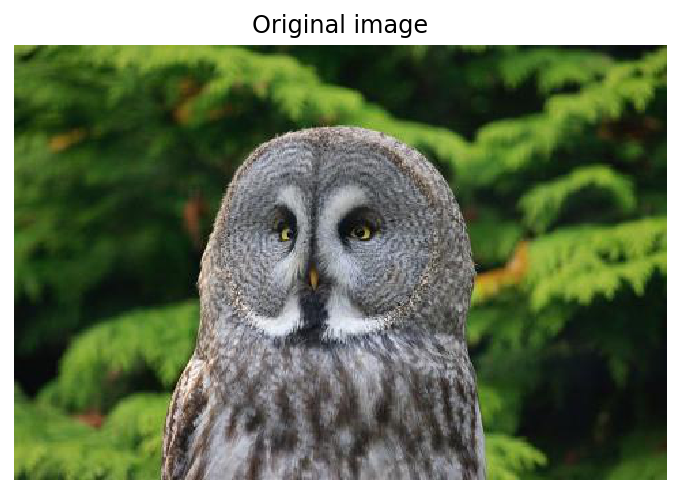

In [3]:
image = load_image('./images/great_grey_owl.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

### 2. Load a pre-trained Model

In [4]:
model = models.alexnet(pretrained=True)

### 3. Create an instance of Backprop with the model

In [5]:
backprop = Backprop(model)

### 4. Calculate the gradients of a target class w.r.t the input image

By default, we return the gradients of all the colour channel.

You can also specify to return a max gradients across the colour channel via `take_max=True` flag, as this was what the authors did in the [paper](https://arxiv.org/pdf/1312.6034.pdf) and sometimes it renders better for visualization.

In [6]:
imagenet = ImageNetIndex()
target_class = imagenet['great grey owl']

input_ = apply_transforms(image)

# Calculate the gradients of each pixel w.r.t. the input image

gradients = backprop.calculate_gradients(input_, target_class)

# Or, take the maximum of the gradients for each pixel across colour channels.

max_gradients = backprop.calculate_gradients(input_, target_class, take_max=True)

print('Shape of the gradients:', gradients.shape)
print('Shape of the max gradients:', max_gradients.shape)

Shape of the gradients: torch.Size([3, 224, 224])
Shape of the max gradients: torch.Size([1, 224, 224])


### 5. Visualize the input image and gradients side-by-side

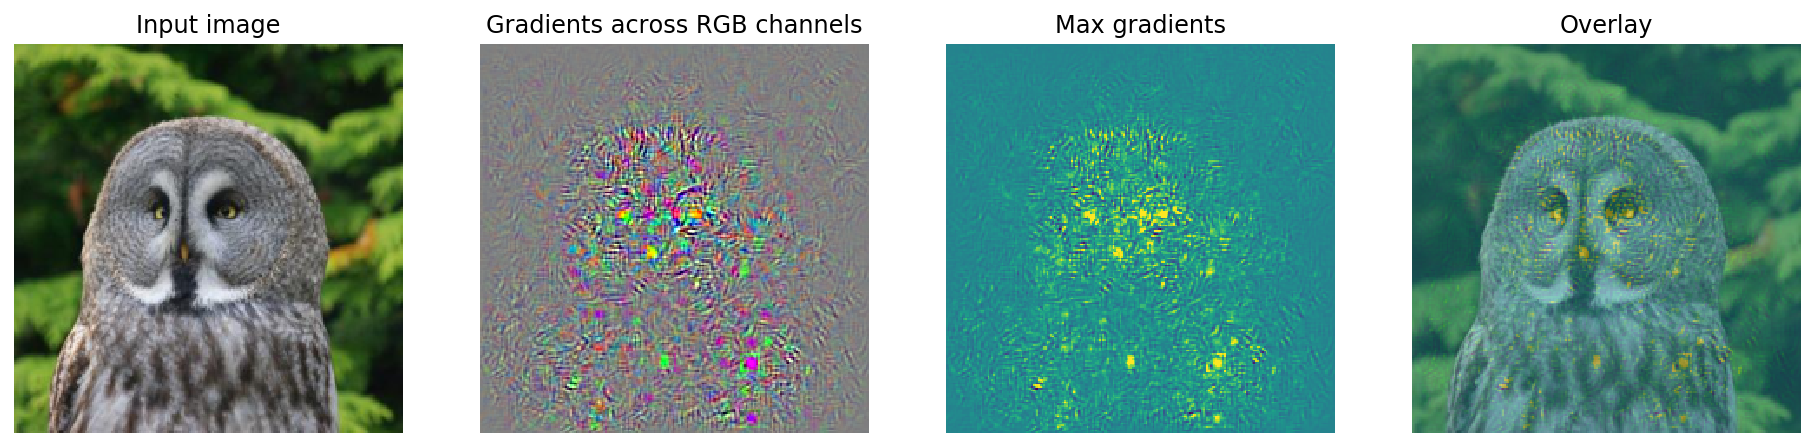

In [7]:
backprop.visualize(input_, target_class)

### 6. Visualize with _guided_ backprogation 

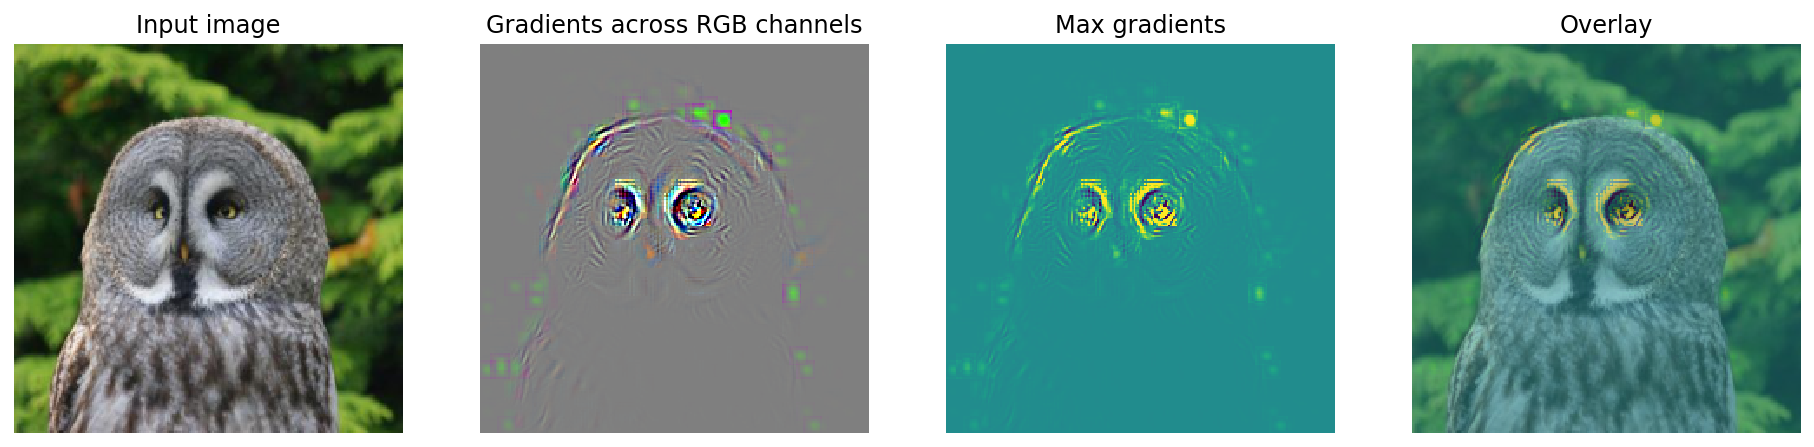

In [8]:
backprop.visualize(input_, target_class, guided=True)